The projects is focus on creating a model to predict the probability of an enrolled candidtate to look for a new job  
The data provided has been splitted into train and test data. In this project, we will use the train data to create the model, check the accuracy of the model and then test the model on the test data

Import the required packages

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
test_data = pd.read_csv('test_data.csv')

In [3]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15021 entries, 0 to 15020
Data columns (total 13 columns):
enrollee_id               15021 non-null int64
city                      15021 non-null object
city_development_index    15021 non-null float64
gender                    11633 non-null object
relevent_experience       15021 non-null object
enrolled_university       14742 non-null object
education_level           14626 non-null object
major_discipline          12628 non-null object
experience                14977 non-null object
company_size              10970 non-null object
company_type              10691 non-null object
last_new_job              14717 non-null object
training_hours            15021 non-null int64
dtypes: float64(1), int64(2), object(10)
memory usage: 1.5+ MB


In [4]:
train_data = pd.read_csv('train_data.csv')

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
enrollee_id               18359 non-null int64
city                      18359 non-null object
city_development_index    18359 non-null float64
gender                    14261 non-null object
relevent_experience       18359 non-null object
enrolled_university       18017 non-null object
education_level           17902 non-null object
major_discipline          15521 non-null object
experience                18300 non-null object
company_size              13580 non-null object
company_type              13320 non-null object
last_new_job              17992 non-null object
training_hours            18359 non-null int64
target                    18359 non-null int64
dtypes: float64(1), int64(3), object(10)
memory usage: 2.0+ MB


In [6]:
train_data1 = train_data.copy()
test_data1 = test_data.copy()

In [7]:
train_data1.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [8]:
print ('Shape for test data: ', test_data1.shape)
print ('Shape of train data: ', train_data1.shape)

Shape for test data:  (15021, 13)
Shape of train data:  (18359, 14)


In [9]:
train_data1.describe()

,enrollee_id,city_development_index,training_hours,target
count,18359.000000,18359.000000,18359.000000,18359.000000
mean,16729.360096,0.847140,65.899014,0.132088
std,9643.749725,0.110189,60.885300,0.338595
min,1.000000,0.448000,1.000000,0.000000
25%,8378.500000,0.796000,23.000000,0.000000
50%,16706.000000,0.910000,47.000000,0.000000
75%,25148.500000,0.920000,89.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


Going though the columns to see the ones to convert using pd.get_dummies

In [10]:
train_data1['relevent_experience'].value_counts()

Has relevent experience    13596
No relevent experience      4763
Name: relevent_experience, dtype: int64

In [11]:
train_data1['gender'].value_counts()

Male      12884
Female     1188
Other       189
Name: gender, dtype: int64

In [12]:
train_data1.enrolled_university.value_counts()

no_enrollment       13659
Full time course     3187
Part time course     1171
Name: enrolled_university, dtype: int64

In [13]:
df2 = train_data1.education_level.value_counts().to_frame()

In [14]:
df2

,education_level
Graduate,10769
Masters,4319
High School,2032
Phd,459
Primary School,323


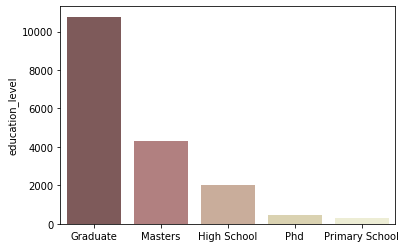

In [15]:
sns.barplot(data = df2, x = df2.index, y = 'education_level', palette = 'pink')

The column selected for conversion into numerical catergorical data is relevant experience  
Convert the relevant experience column of both the test and training data

In [16]:
train_data1['relevent_experience'] = pd.get_dummies(train_data1['relevent_experience'], drop_first=True)
test_data1['relevent_experience'] = pd.get_dummies(test_data1['relevent_experience'], drop_first=True)

In [17]:
train_data1.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,0,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,0,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,0,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,0,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,1,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


Select the required columns which are the independent variables for both the train and the test data

In [18]:
new_train = train_data1[['enrollee_id','city_development_index','relevent_experience', 'experience','last_new_job','training_hours']]
new_test =  test_data1[['enrollee_id','city_development_index','relevent_experience', 'experience','last_new_job','training_hours']]

In [19]:
new_train.head()

,enrollee_id,city_development_index,relevent_experience,experience,last_new_job,training_hours
0,23798,0.689,0,3,1,106
1,29166,0.923,0,14,1,69
2,46,0.910,0,6,2,4
3,18527,0.666,0,14,1,26
4,21751,0.887,1,8,2,88


Searching and cleaning up missing data

In [20]:
new_train['experience'] = new_train['experience'].replace('>20','20')
new_test['experience'] = new_test['experience'].replace('>20','20')
new_train['experience'] = new_train['experience'].replace('<1','1')
new_test['experience'] = new_test['experience'].replace('<1','1')

Checking missing values and replacing them

In [21]:
new_train.isnull().sum()

enrollee_id                 0
city_development_index      0
relevent_experience         0
experience                 59
last_new_job              367
training_hours              0
dtype: int64

In [22]:
new_test.isnull().sum()

enrollee_id                 0
city_development_index      0
relevent_experience         0
experience                 44
last_new_job              304
training_hours              0
dtype: int64

In [23]:
new_train['experience'].fillna(method = 'ffill', inplace = True)
new_train['last_new_job'].fillna(method = 'ffill', inplace = True)
new_test['last_new_job'].fillna(method = 'ffill', inplace = True)
new_test['experience'].fillna(method = 'ffill', inplace = True)

In [24]:
new_test['last_new_job'].fillna(method = 'bfill', inplace = True)

In [25]:
new_train['last_new_job'] = new_train['last_new_job'].str.replace('>4','4')
new_train['last_new_job'] = new_train['last_new_job'].str.replace('never','0')
new_test['last_new_job'] = new_test['last_new_job'].str.replace('>4','4')
new_test['last_new_job'] = new_test['last_new_job'].str.replace('never','0')


Convert 'experience' and 'last_new_job' columns to integer

In [26]:
new_train['experience'] = new_train['experience'].astype('int')
new_test['experience'] = new_test['experience'].astype('int')
new_train['last_new_job'] = new_train['last_new_job'].astype('int')
new_test['last_new_job'] = new_test['last_new_job'].astype('int')

Standardize the data and transform the standardized data to a dataframe

In [27]:
standard = StandardScaler()

In [28]:
new_train1 = standard.fit_transform(new_train)
new_test1 = standard.fit_transform(new_test)

In [29]:
new_train1 = pd.DataFrame(new_train1)
new_test1 = pd.DataFrame(new_test1)

In [30]:
new_train1.columns = new_train.columns
new_test1.columns = new_test.columns

In [31]:
new_test1.head()

,enrollee_id,city_development_index,relevent_experience,experience,last_new_job,training_hours
0,-0.009869,-3.634111,1.683112,-1.449384,-0.634154,-0.839928
1,-0.478571,0.841499,1.683112,1.484886,-0.634154,0.482973
2,-0.579854,0.668308,1.683112,-1.140514,-0.634154,-0.806437
3,-1.206141,0.704769,1.683112,1.484886,0.090338,0.181553
4,0.099308,-0.152068,-0.594138,-0.677208,0.090338,-0.002649


In [32]:
new_train1.head()

,enrollee_id,city_development_index,relevent_experience,experience,last_new_job,training_hours
0,0.732996,-1.435209,-0.591881,-1.146088,-0.634528,0.658650
1,1.289641,0.688478,-0.591881,0.552438,-0.634528,0.050933
2,-1.730013,0.570495,-0.591881,-0.682854,0.087193,-1.016677
3,0.186410,-1.643947,-0.591881,0.552438,-0.634528,-0.655332
4,0.520729,0.361757,1.689528,-0.374031,0.087193,0.363004


Splitting the train_data with train_test_split 

In [33]:
X = new_train1
y = train_data1['target']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Using Logistic Regression to create the model

In [35]:
logit = LogisticRegression(solver='lbfgs')

In [36]:
logmodel = logit.fit(X_train,y_train)

In [37]:
y_predict = logmodel.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
print (confusion_matrix(y_test, y_predict))

[[4740    0]
 [ 768    0]]


In [40]:
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93      4740
           1       0.00      0.00      0.00       768

    accuracy                           0.86      5508
   macro avg       0.43      0.50      0.46      5508
weighted avg       0.74      0.86      0.80      5508



Using SVM to create the model

In [41]:
clf = svm.SVC(kernel='rbf',gamma = 'auto')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
svm_y_predict = clf.predict(X_test)

In [43]:
print (classification_report(y_test, svm_y_predict))
print (confusion_matrix(y_test, svm_y_predict))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93      4740
           1       0.00      0.00      0.00       768

    accuracy                           0.86      5508
   macro avg       0.43      0.50      0.46      5508
weighted avg       0.74      0.86      0.80      5508

[[4740    0]
 [ 768    0]]


Using the logistic Regression model to predict the target value for the test data

In [44]:
predict_test_data = logmodel.predict(new_test1)

In [45]:
score = pd.DataFrame(predict_test_data, columns = ['target'])

In [46]:
score.head()

,target
0,0
1,0
2,0
3,0
4,0


In [47]:
test_data1['target'] = score['target']

In [48]:
test_data1.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [49]:
final_submission = test_data1[['enrollee_id','target']]

In [52]:
final_submission.to_csv('final_submission.csv', index = False)